In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import csv
from IPython.display import display

In [2]:
def load_lookup_data():
    return pd.read_csv('./data/hurricane_lookups.csv', keep_default_na=False)

def update_lookup(df_data, df_lookup, col_name, lookup_type):
    df_lk = df_lookup[df_lookup.TYPE == lookup_type]
    df_temp = df_data.merge(df_lk, how='left', left_on=col_name, right_on='CODE')
    df_temp = df_temp.drop(['TYPE', 'CODE'], axis=1)
    df_temp = df_temp.rename(columns={'DESC': col_name + '_DESC'})
    return df_temp

In [3]:
df_lookup = load_lookup_data()
df_data = pd.read_csv('./data/atlantic_out.csv')

In [48]:
#Number of Hurricanes by Category
b = df_data.groupby('ID')['CATEGORY'].max().to_frame().reset_index()
# print (b)
df_category = b.groupby('CATEGORY')['ID'].unique().to_frame().reset_index()
df_category['Num'] = df_category['ID'].str.len()
df_category.drop('ID', axis=1, inplace=True)

In [49]:
update_lookup(df_category, df_lookup, 'CATEGORY', 'CATEGORY')

,CATEGORY,Num,CATEGORY_DESC
0,-1,41,Tropical Depression
1,0,201,Tropical Storm
2,1,86,Category 1
3,2,34,Category 2
4,3,35,Category 3
5,4,41,Category 4
6,5,13,Category 5


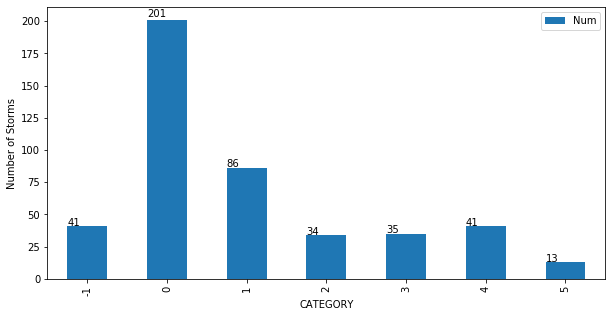

In [64]:
ax = df_category.plot.bar(x='CATEGORY', y='Num', figsize=(10,5))
plt.ylabel('Number of Storms')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.0125))

In [106]:
#Created Pivot Table of Hurricane Categories and Total by Year
df_pivot = df_data.groupby('ID')['CATEGORY'].max().to_frame().reset_index()
df_year = df_data.groupby(['ID', 'YEAR'])['CATEGORY'].unique().to_frame().reset_index()
df_year.drop('CATEGORY', axis=1, inplace=True)

df_pivot =  df_pivot.merge(df_year, how='inner', left_on='ID', right_on='ID')
df_pivot = update_lookup(df_pivot, df_lookup, 'CATEGORY', 'CATEGORY')
table = pd.pivot_table(df_pivot, values='ID', index=['YEAR'],
                    columns=['CATEGORY_DESC'], aggfunc='count', fill_value=0, margins=True)
table

CATEGORY_DESC,Category 1,Category 2,Category 3,Category 4,Category 5,Tropical Depression,Tropical Storm,All
YEAR,,,,,,,,
1982,1,0,0,1,0,0,3,5
1983,2,0,1,0,0,0,1,4
1984,1,1,0,1,0,0,6,9
1985,4,0,2,1,0,0,4,11
1986,3,1,0,0,0,0,2,6
1987,1,0,0,0,0,0,2,3
1988,1,0,0,2,0,0,6,9
1989,2,1,0,1,1,0,4,9
1990,3,2,1,0,0,0,4,10
